In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





In [5]:
# Load the dataset
file_path = '/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv'

# Load the dataset with low_memory set to False
data = pd.read_csv(file_path, low_memory=False)


In [6]:
# Display basic information about the dataset
print("Basic Information:")
print(data.info())
print("\n")

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount         

In [7]:
# Display the first few rows of the dataset
print("First Few Rows:")
print(data.head())
print("\n")

First Few Rows:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ..

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)
print("\n")

Missing Values:
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64




In [9]:
# Drop columns with a high percentage of missing values
threshold = 0.5  # If more than 50% of the values are missing, drop the column
data = data.dropna(thresh=int(threshold * len(data)), axis=1)


In [10]:

# Fill missing values for numeric columns with the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


In [11]:
# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)
    # Convert to category type if not already
    if data[col].dtype != 'category':
        data[col] = data[col].astype('category')

/tmp/ipykernel_33/3708964362.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(mode)


In [12]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')



In [13]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [14]:
# Ensure no infinite values exist in the dataset
print("Checking for infinite values:")
print((data == np.inf).sum())
print((data == -np.inf).sum())


Checking for infinite values:
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
Unnamed: 22           0
dtype: int64
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city            

In [15]:
# Summary statistics
print("Summary Statistics:")
print(data.describe(include='all'))
print("\n")


Summary Statistics:
                index             Order ID                 Date   Status  \
count   128975.000000               128975               128975   128975   
unique            NaN               120378                   91       13   
top               NaN  403-4984515-8861958  2022-05-03 00:00:00  Shipped   
freq              NaN                   12                 2085    77804   
mean     64487.000000                  NaN                  NaN      NaN   
std      37232.019822                  NaN                  NaN      NaN   
min          0.000000                  NaN                  NaN      NaN   
25%      32243.500000                  NaN                  NaN      NaN   
50%      64487.000000                  NaN                  NaN      NaN   
75%      96730.500000                  NaN                  NaN      NaN   
max     128974.000000                  NaN                  NaN      NaN   

       Fulfilment Sales Channel  ship-service-level    Style       

In [16]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/kaggle/working/Cleaned_Amazon_Sale_Report.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data has been saved to {cleaned_file_path}")


Cleaned data has been saved to /kaggle/working/Cleaned_Amazon_Sale_Report.csv


In [17]:

# Load the cleaned dataset
cleaned_file_path = '/kaggle/working/Cleaned_Amazon_Sale_Report.csv'
cleaned_data = pd.read_csv(cleaned_file_path)



In [18]:
# Display basic information about the cleaned dataset
print("Cleaned Data Basic Information:")
print(cleaned_data.info())
print("\n")


Cleaned Data Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Am

In [19]:
# Display the first few rows of the cleaned dataset
print("First Few Rows of Cleaned Data:")
print(cleaned_data.head())
print("\n")

First Few Rows of Cleaned Data:
   index             Order ID        Date                        Status  \
0      0  405-8078784-5731545  2022-04-30                     Cancelled   
1      1  171-9198151-1101146  2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  2022-04-30                       Shipped   
3      3  403-9615377-8133951  2022-04-30                     Cancelled   
4      4  407-1069790-7240320  2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... Qty currency  Amount    ship-city   sh

In [20]:
# Check for missing values in the cleaned dataset
cleaned_missing_values = cleaned_data.isnull().sum()
print("Missing Values in Cleaned Data:")
print(cleaned_missing_values)
print("\n")

Missing Values in Cleaned Data:
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
Unnamed: 22           0
dtype: int64




In [21]:


# Summary statistics for the cleaned dataset
print("Summary Statistics of Cleaned Data:")
print(cleaned_data.describe(include='all'))
print("\n")


Summary Statistics of Cleaned Data:
                index             Order ID        Date   Status Fulfilment  \
count   128975.000000               128975      128975   128975     128975   
unique            NaN               120378          91       13          2   
top               NaN  171-5057375-2831560  2022-05-03  Shipped     Amazon   
freq              NaN                   12        2085    77804      89698   
mean     64487.000000                  NaN         NaN      NaN        NaN   
std      37232.019822                  NaN         NaN      NaN        NaN   
min          0.000000                  NaN         NaN      NaN        NaN   
25%      32243.500000                  NaN         NaN      NaN        NaN   
50%      64487.000000                  NaN         NaN      NaN        NaN   
75%      96730.500000                  NaN         NaN      NaN        NaN   
max     128974.000000                  NaN         NaN      NaN        NaN   

       Sales Channel  ship-

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


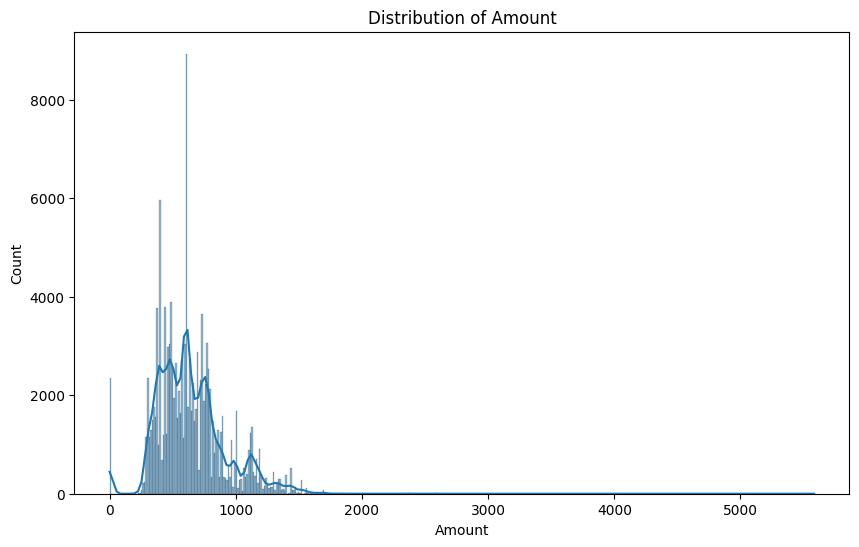

In [22]:

# Univariate Analysis - Numerical Features
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


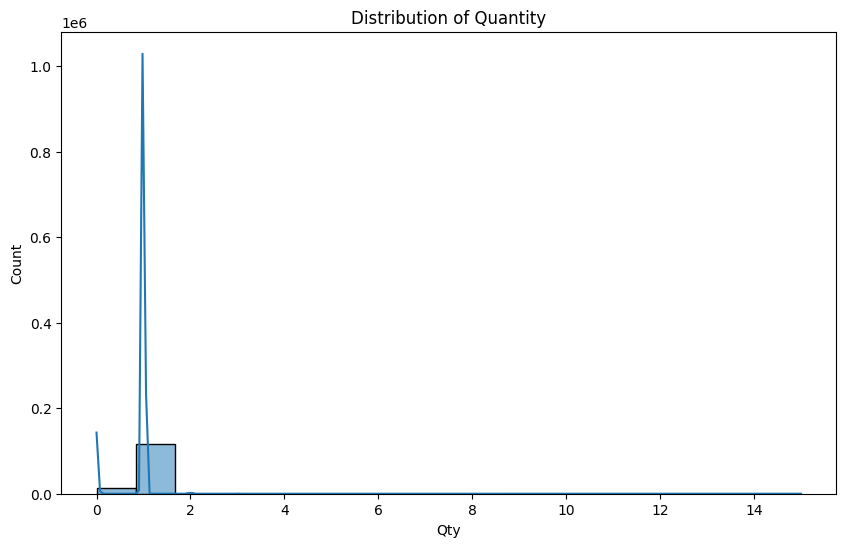

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Qty'], kde=True)
plt.title('Distribution of Quantity')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


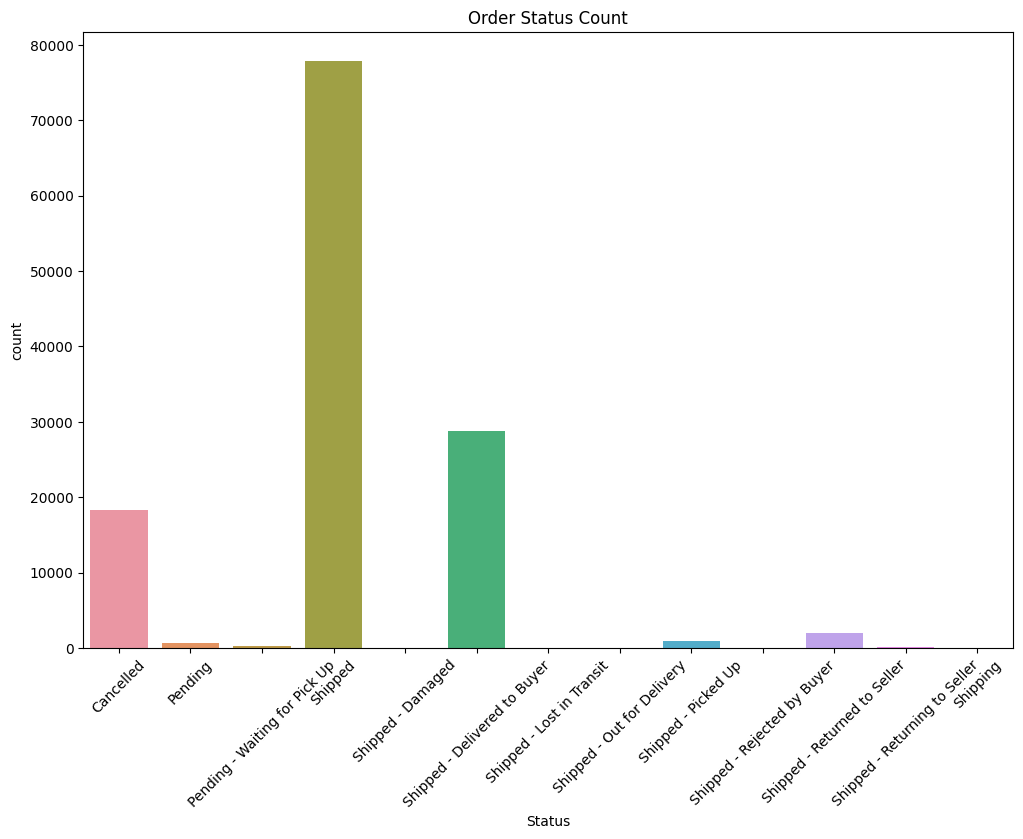

In [24]:
# Univariate Analysis - Categorical Features
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Status')
plt.title('Order Status Count')
plt.xticks(rotation=45)
plt.show()

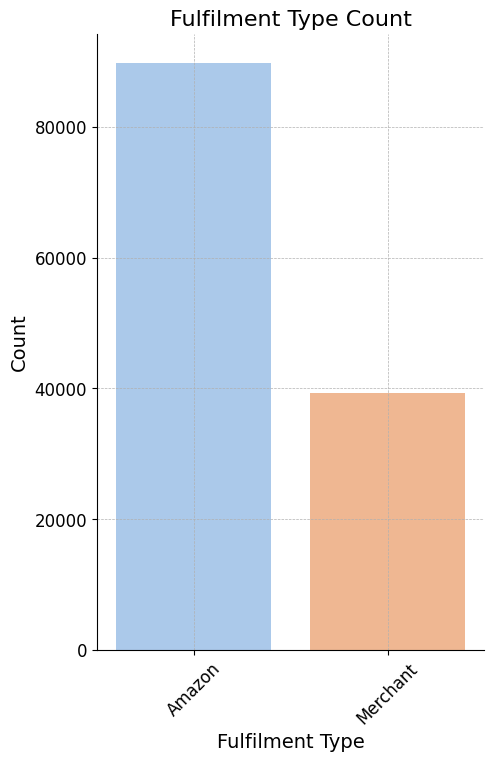

In [33]:

# Set a light color palette
sns.set_palette("pastel")

# Customize the plot with a light background
plt.figure(figsize=(5, 8))
sns.countplot(data=data, x='Fulfilment')
plt.title('Fulfilment Type Count', fontsize=16)
plt.xlabel('Fulfilment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine()
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


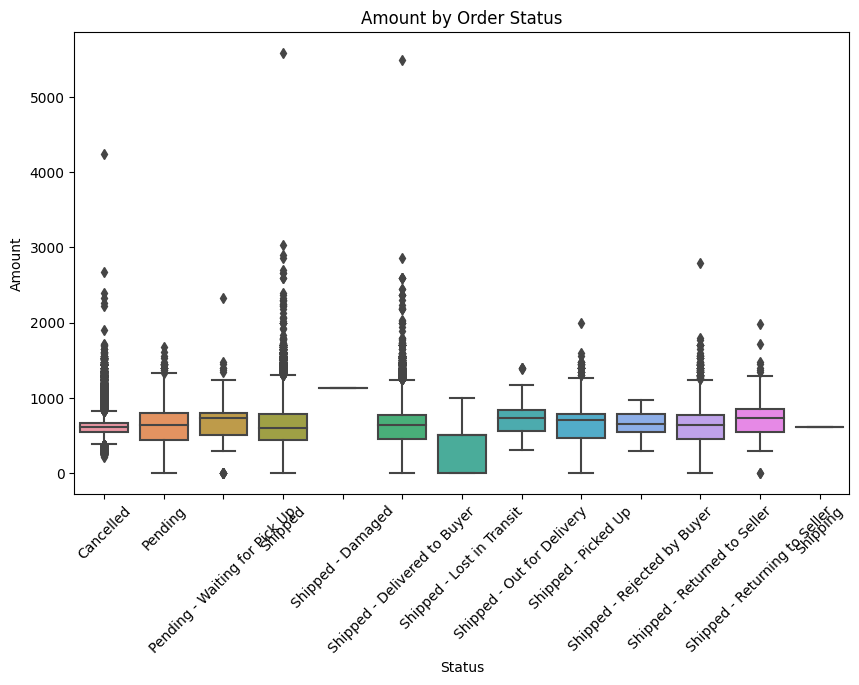

In [26]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Amount', data=data)
plt.title('Amount by Order Status')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


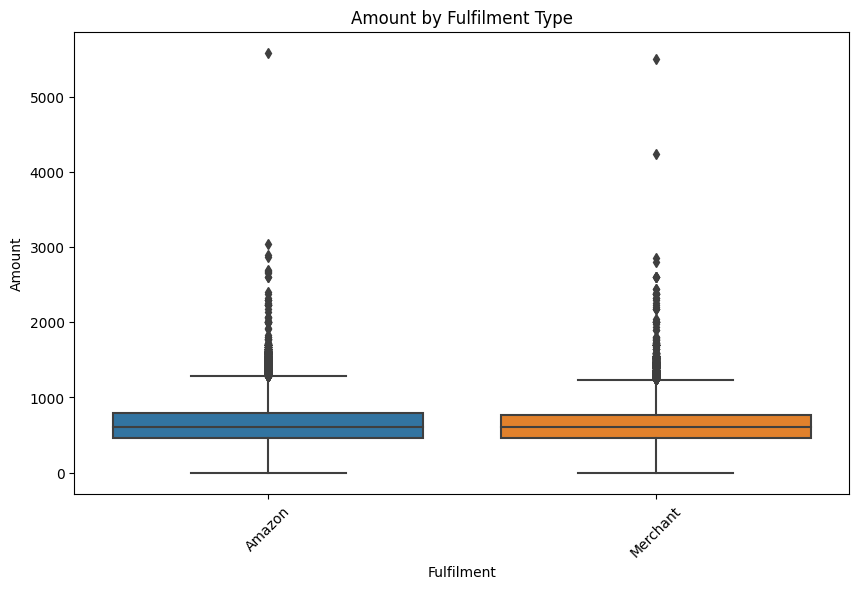

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fulfilment', y='Amount', data=data)
plt.title('Amount by Fulfilment Type')
plt.xticks(rotation=45)
plt.show()


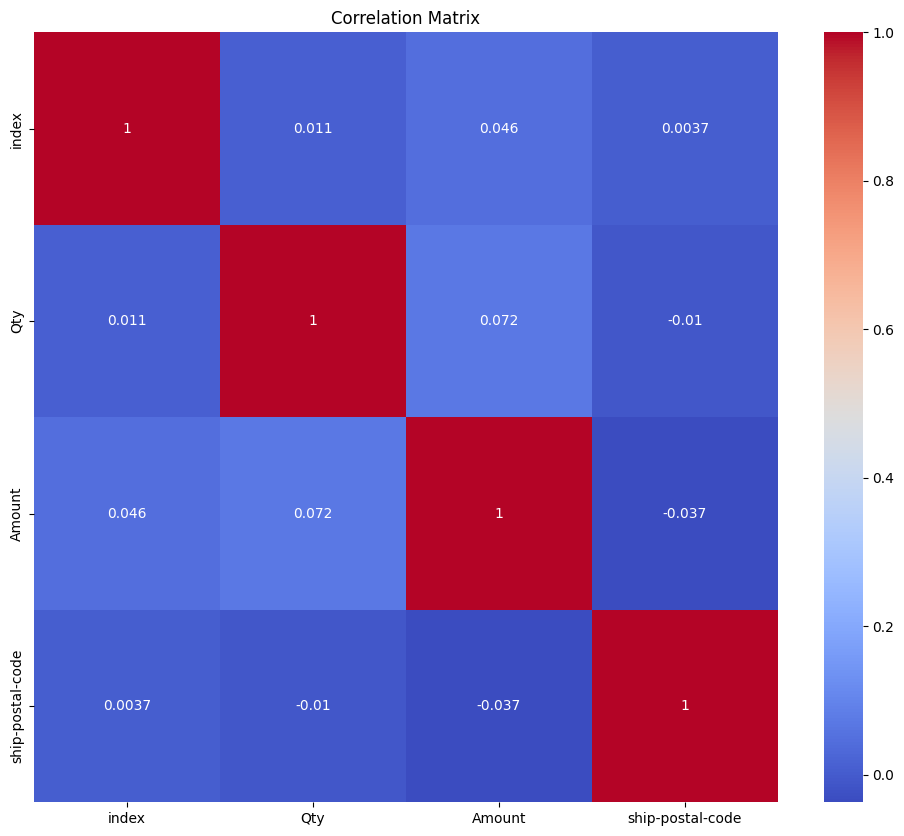

In [30]:
# Select only numeric columns for correlation matrix
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


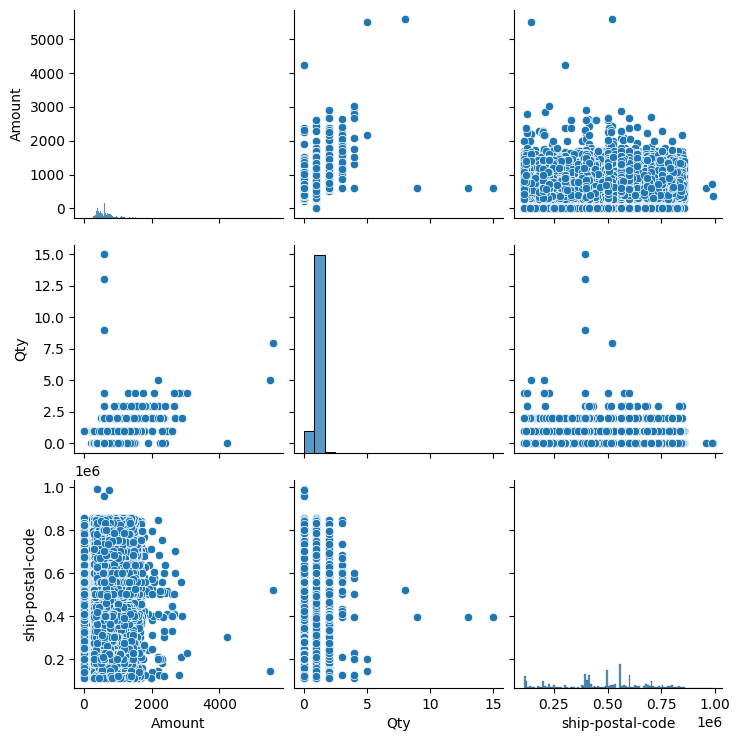

In [31]:
# Ensure no infinite values before pair plot
data = data.replace([np.inf, -np.inf], np.nan)

# Pair Plot for Multivariate Analysis
selected_columns = ['Amount', 'Qty', 'ship-postal-code']
sns.pairplot(data[selected_columns].dropna())
plt.show()

/tmp/ipykernel_33/942470802.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data = data.groupby('Date')['Amount'].sum().reset_index()


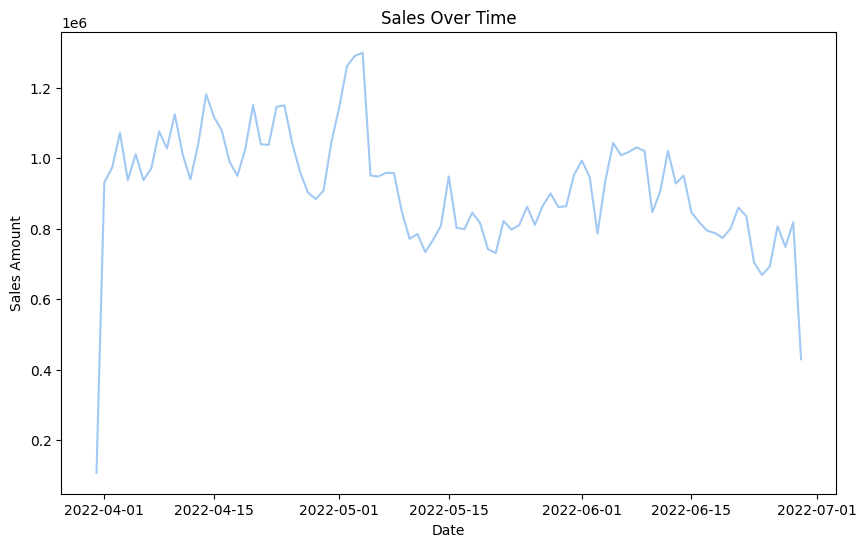

In [42]:

from statsmodels.tsa.arima.model import ARIMA  
from sklearn.metrics import mean_squared_error

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')

# Aggregate sales by date
sales_data = data.groupby('Date')['Amount'].sum().reset_index()

# Set 'Date' as the index
sales_data.set_index('Date', inplace=True)

# Ensure the date index is sorted
sales_data = sales_data.sort_index()

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(sales_data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()


In [43]:
# Ensure the date index has a daily frequency
sales_data = sales_data.asfreq('D')


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [44]:
# Split into train and test sets
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]


In [45]:
# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   72
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -950.084
Date:                Sun, 16 Jun 2024   AIC                           1912.167
Time:                        01:09:46   BIC                           1925.744
Sample:                    03-31-2022   HQIC                          1917.566
                         - 06-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1218      0.098      1.242      0.214      -0.070       0.314
ar.L2         -0.0715      0.070     -1.026      0.305      -0.208       0.065
ar.L3         -0.3355      0.046     -7.217      0.0

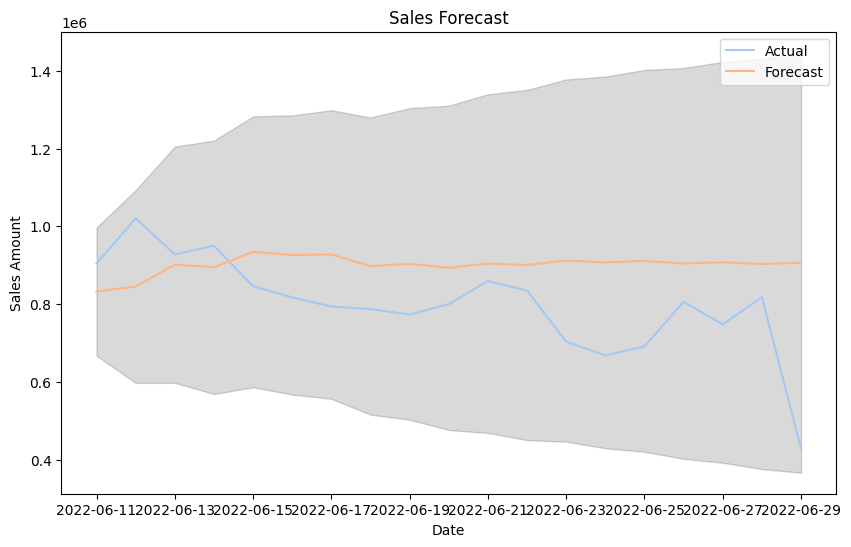

In [47]:
# Forecast
forecast_result = model_fit.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=.15)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


In [48]:
# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28443218825.19441


In [52]:

!pip install pmdarima

import pmdarima as pm



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.8 MB/s eta 0:00:00a 0:00:01


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1947.005, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2189.940, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1908.984, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2142.207, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1910.847, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1938.679, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1941.249, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1922.842, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.695 seconds


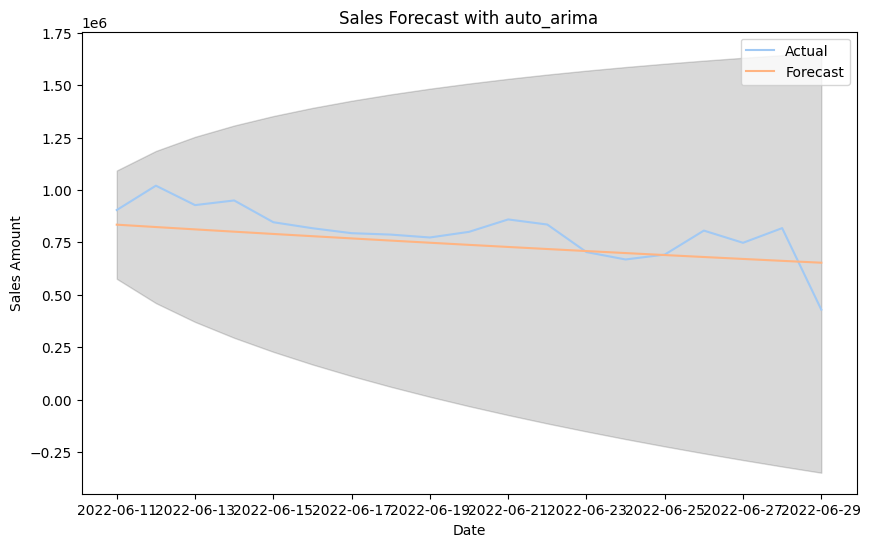

In [53]:
# Fit auto_arima model
model_auto = pm.auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Forecast
forecast_auto = model_auto.predict(n_periods=len(test))
conf_int_auto = model_auto.predict(n_periods=len(test), return_conf_int=True)[1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_auto, label='Forecast')
plt.fill_between(test.index, conf_int_auto[:, 0], conf_int_auto[:, 1], color='k', alpha=.15)
plt.title('Sales Forecast with auto_arima')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [54]:
# Evaluate the model
mse_auto = mean_squared_error(test, forecast_auto)
print(f'Mean Squared Error with auto_arima: {mse_auto}')


Mean Squared Error with auto_arima: 11478734395.516043


In [61]:
!pip install prophet


In [63]:
from prophet import Prophet

# Prepare the data for Prophet
train_prophet = train.reset_index().rename(columns={'Date': 'ds', 'Amount': 'y'})
test_prophet = test.reset_index().rename(columns={'Date': 'ds', 'Amount': 'y'})

# Fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(train_prophet)





01:33:27 - cmdstanpy - INFO - Chain [1] start processing
01:33:27 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


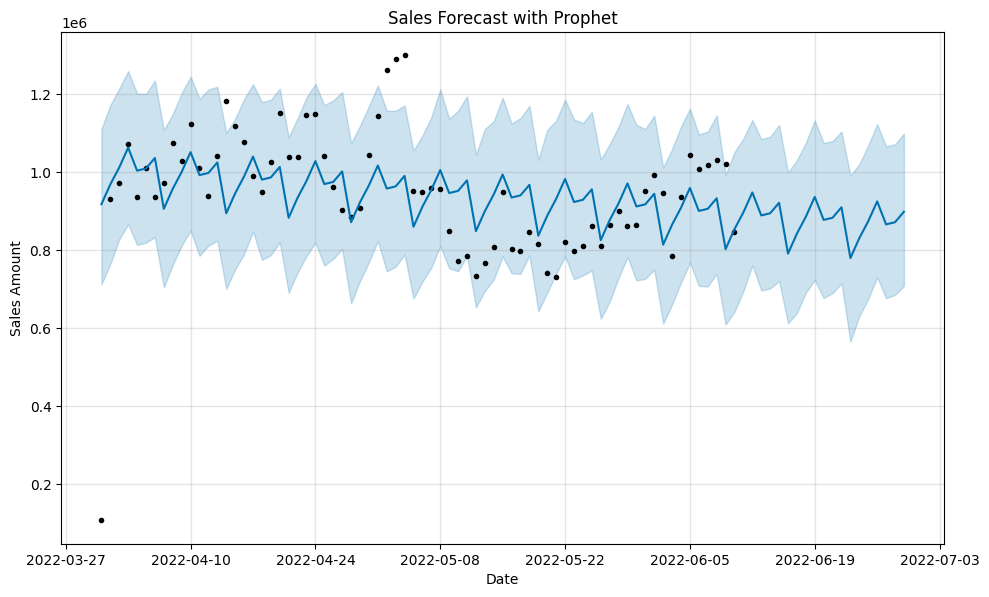

In [64]:
# Make a future dataframe
future = model_prophet.make_future_dataframe(periods=len(test), freq='D')

# Forecast
forecast_prophet = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

In [65]:
# Evaluate the model
forecast_prophet_test = forecast_prophet.set_index('ds').loc[test.index]
mse_prophet = mean_squared_error(test, forecast_prophet_test['yhat'])
print(f'Mean Squared Error with Prophet: {mse_prophet}')


Mean Squared Error with Prophet: 20167972222.9499


In [66]:
# Define holidays
holidays = pd.DataFrame({
    'holiday': 'promotion',
    'ds': pd.to_datetime(['2022-11-25', '2022-12-25']),  # Example dates for promotions or holidays
    'lower_window': 0,
    'upper_window': 1,
})



In [67]:
# Make a future dataframe
future = model_prophet.make_future_dataframe(periods=len(test), freq='D')
future = model_prophet.predict(future)


In [68]:
# Fit the Prophet model with holidays
model_prophet = Prophet(holidays=holidays)
model_prophet.fit(train_prophet)


01:36:53 - cmdstanpy - INFO - Chain [1] start processing
01:36:54 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


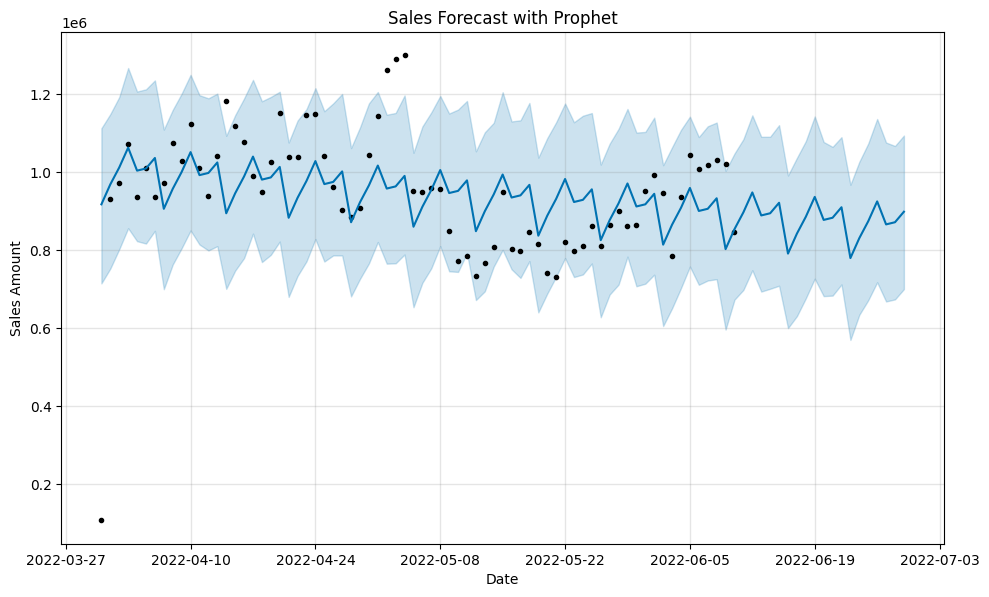

In [69]:
# Forecast
forecast_prophet = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

In [70]:
# Evaluate the model
forecast_prophet_test = forecast_prophet.set_index('ds').loc[test.index]
mse_prophet = mean_squared_error(test, forecast_prophet_test['yhat'])
print(f'Mean Squared Error with Prophet: {mse_prophet}')


Mean Squared Error with Prophet: 20167972803.476376


In [71]:
# Fit the Prophet model with custom parameters
model_prophet = Prophet(changepoint_prior_scale=0.5)  # Example of adjusting changepoint prior scale
model_prophet.fit(train_prophet)






01:38:12 - cmdstanpy - INFO - Chain [1] start processing
01:38:13 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# Make a future dataframe
future = model_prophet.make_future_dataframe(periods=len(test), freq='D')


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


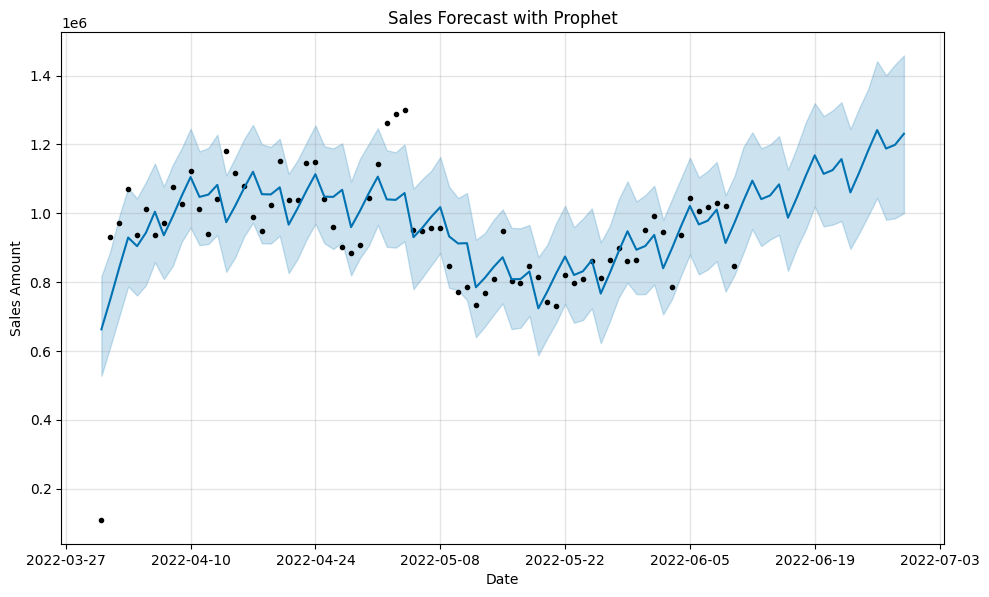

In [73]:
# Forecast
forecast_prophet = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast_prophet)
plt.title('Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

In [74]:
# Evaluate the model
forecast_prophet_test = forecast_prophet.set_index('ds').loc[test.index]
mse_prophet = mean_squared_error(test, forecast_prophet_test['yhat'])
print(f'Mean Squared Error with Prophet: {mse_prophet}')


Mean Squared Error with Prophet: 130045344567.76599


In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model_exp_smooth = ExponentialSmoothing(train, trend='add', seasonal=None, seasonal_periods=None).fit()





/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


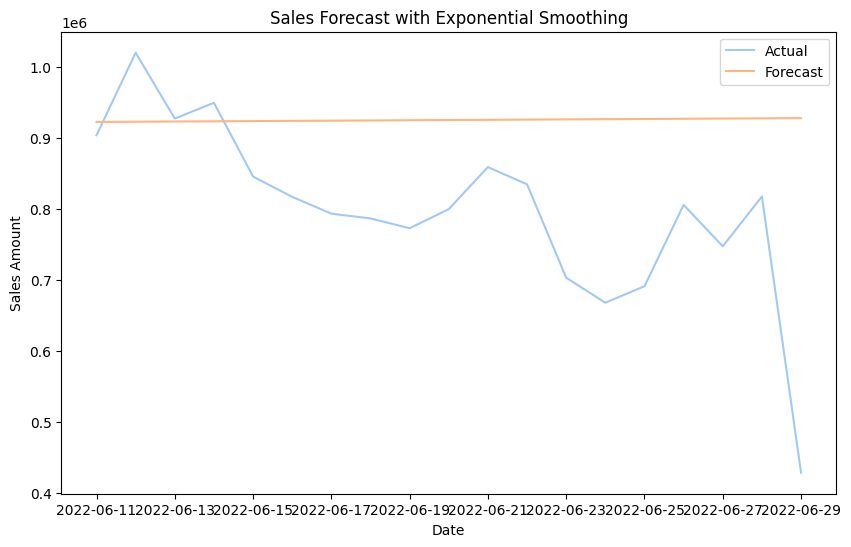

In [76]:
# Forecast
forecast_exp_smooth = model_exp_smooth.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_exp_smooth, label='Forecast')
plt.title('Sales Forecast with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [77]:
# Evaluate the model
mse_exp_smooth = mean_squared_error(test, forecast_exp_smooth)
print(f'Mean Squared Error with Exponential Smoothing: {mse_exp_smooth}')


Mean Squared Error with Exponential Smoothing: 31392173543.11778
